In [22]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [23]:

# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')  # Replace with your actual file path
print("Initial data:")
print(df.head())

#  Handle missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Fill missing values with column mean
df = df.fillna(df.mean(numeric_only=True))

print("\nMissing values after cleaning:")
print(df.isnull().sum())

#  Convert 'num' column to binary 'target'
# 0 = no disease, 1–4 = disease → binary classification
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


Initial data:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal  

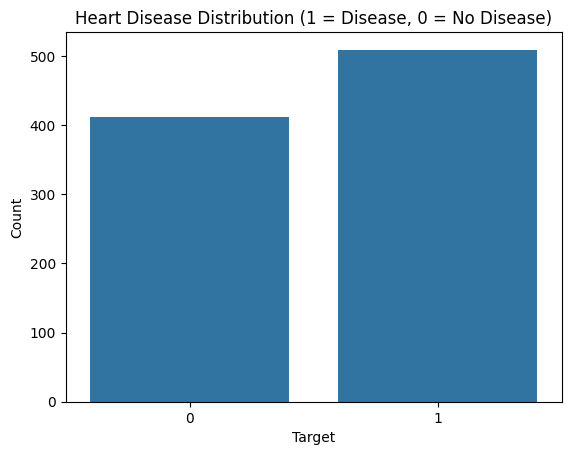

<Figure size 1200x1000 with 0 Axes>

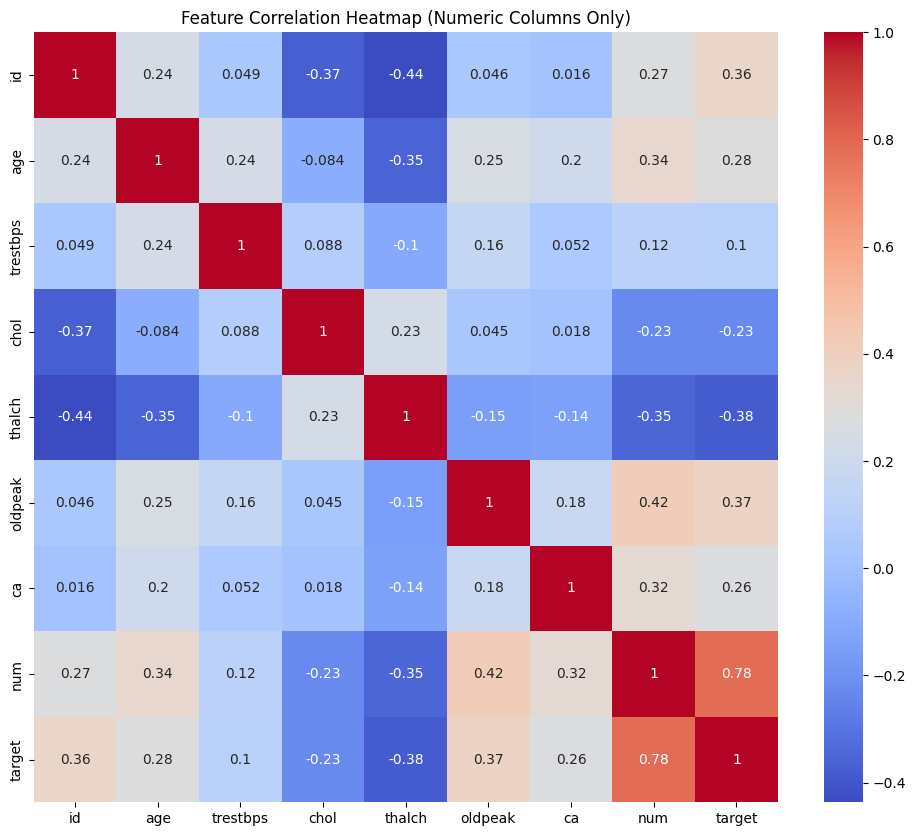

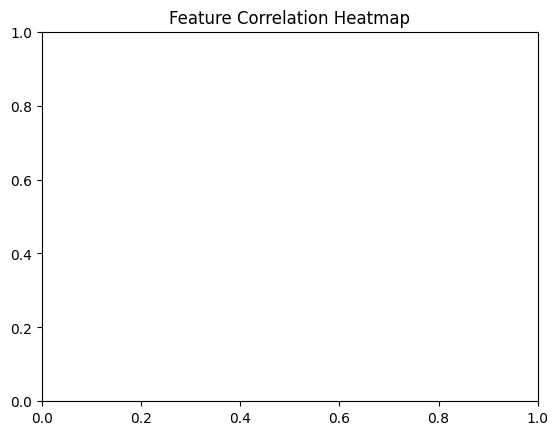

In [24]:

# Exploratory Data Analysis (EDA)

# Distribution of target variable
sns.countplot(data=df, x='target')
plt.title('Heart Disease Distribution (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (Numeric Columns Only)')
plt.show()

plt.title('Feature Correlation Heatmap')
plt.show()

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})



In [25]:

#  Split the data into training and testing sets
# Drop target and num from features
X = df.drop(['target', 'num'], axis=1)

# Convert all categorical/string columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

y = df['target']                        # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:

#  Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)


Model Accuracy: 0.8532608695652174


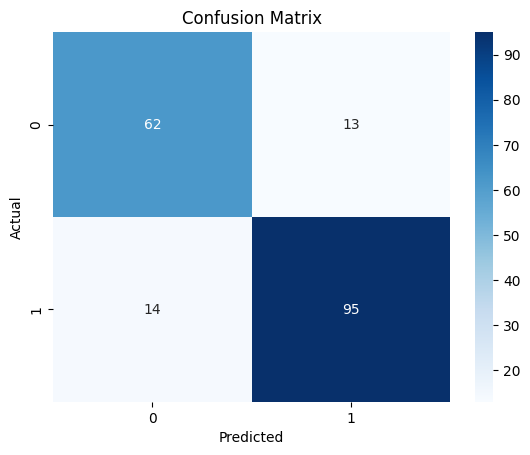

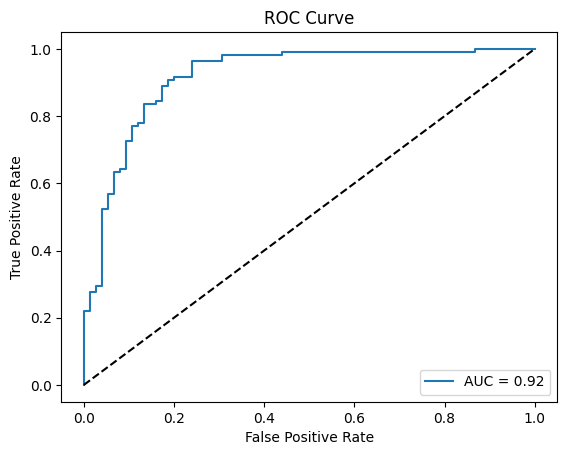

In [27]:

#  Make predictions and evaluate
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc_score(y_test, y_pred_proba), 2)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


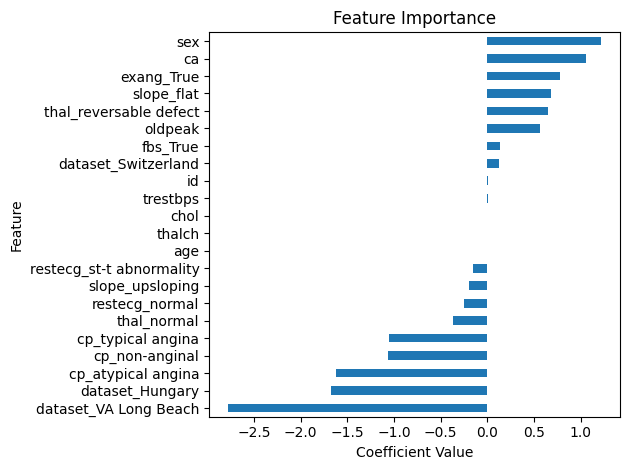

In [28]:

#  Feature importance (based on coefficients)
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()